<a href="https://colab.research.google.com/github/EmmaThomasEKT/Capstone_St1/blob/main/Collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ST1/ST1G Assignment 9 (Capstone Programming Project)**

In [130]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [131]:
%cd /content/drive/MyDrive/Capstone_Project/

/content/drive/MyDrive/Capstone_Project


In [132]:
!ls

car_price_prediction.csv  DataForML_dummies.pkl  DataForML.pkl	Final_XGB_Model.pkl


### This Project is based on the car price data available from Kaggle repository (https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challengeLinks)


*   It contains the details of 18 different car attributes.
*   My project task is to create a machine learning model which can predict the average price of car based on its attributes.
* For solving this problem, I will approach the task, with a step by step approach to create a data analysis and prediction model based on (machine learning/AI algorithms, regression algorith for example) available from different Python packages, modules and classes.

### Step 1: Reading the data Reading the data with python
This is one of the most important steps in data analysis! You must understand the data and the domain well before trying to apply any machine learning/AI algorithm.

In [133]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [134]:
# Reading the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

CarData=pd.read_csv('/content/drive/MyDrive/Capstone_Project/car_price_prediction.csv', encoding='latin')
print('Shape before deleting duplicate values:', CarData.shape)

# Removing duplicate rows if any
CarData=CarData.drop_duplicates()
print('Shape After deleting duplicate values:', CarData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
CarData.head(10)

Shape before deleting duplicate values: (19237, 18)
Shape After deleting duplicate values: (18924, 18)


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4
6,45656768,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4.0,Automatic,Front,04-May,Left wheel,White,12
7,45816158,549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
8,45641395,1098,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
9,45756839,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12


## Key observations from Step 1 about Data Description


*   This file contains 18924 car details.
*   There are 18 attributes and they are outlined below.
*   ID - Car ID.
*   Price - The price of the car.
*   Levy - Fee associated with the car.
*   Manufacturer - Manufacturer or brand of the car.
*   Model - Car model.
*   Prod. year - Production year of the car.
*   Category - Category of the car (e.g., SUV)
*   Leather interior - Indicates presence of leather interior.
*   Fuel type - Type of fuel the car uses (e.g., diesel or petrol).
*   Engine volume - Volume of the engine in the car.
*   Mileage - Distance travelled by the car.
*   Cylinders - Number of cylinders in the car's engine.
*   Gear box type - Type of gear box in the car (e.g., auto or manuel).
*   Drive wheels - Type of drive wheels (e.g., front-wheel or rear-wheel drive).
*   Doors - The amount of doors on the car.
*   Wheel - Type of wheels used on the car.
*   Color - Color of the car.
*   Airbags - Number of airbags in the car.

# Step 2 : Problem Statement Definition
* Creating  a prediction model to predict the price of a car.
* Target Variable: Price
Predictors/Features: Levy, Manufacturer, Model, Prod.year, Category, etc.

## Step 3: Choosing the appropriate ML/AI Algorithm for Data Analysis.
* Based on the problem statement we need to create a supervised ML Regression model, as the target variable is **Continuous**.


# Step 4: Looking at the class distribution (Target variable distribution to check if the data is balanced or skewed.
* If target variable's distribution is too skewed then the predictive modeling will lead to poor results.
* Ideally Bell curve is desirable but slightly positive skew or negative skew is also fine.
* When performing Regression algorithm modelling and analysis, we need to make sure the histogram looks like a bell curve or slight skewed version of it.
* Otherwise it impacts the Machine Learning algorithms ability to learn all the scenarios from the data.

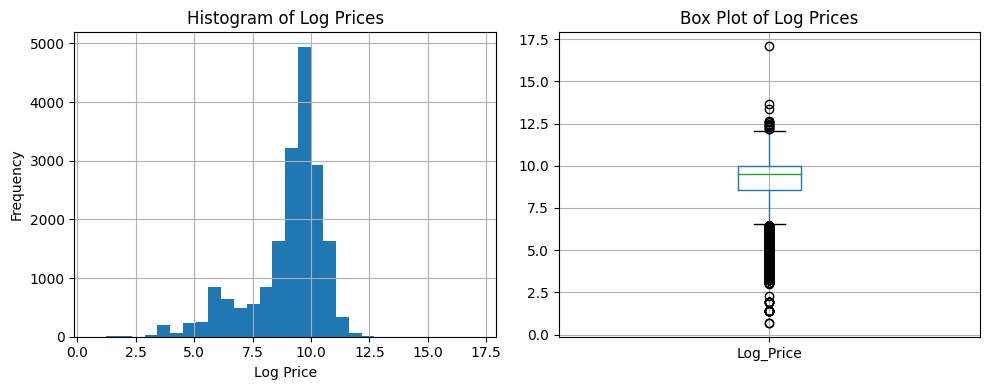

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Log_Price
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,9.497697
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,9.718482
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,9.044050
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,8.190909
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,9.369649
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4,10.583904
6,45656768,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4.0,Automatic,Front,04-May,Left wheel,White,12,7.497762
7,45816158,549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12,6.309918
8,45641395,1098,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069 km,4.0,Automatic,Front,04-May,Left wheel,Black,12,7.002156
9,45756839,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,10.190845


In [135]:
%matplotlib inline

# Ensure no zero values if any, since log(0) is undefined
%matplotlib inline


# Ensure no zero values since log(0) is undefined
# Replace 0 with NaN, drop these rows, and reset the index
CarData['Price'] = CarData['Price'].replace(0, np.nan)
CarData.dropna(subset=['Price'], inplace=True)
CarData.reset_index(drop=True, inplace=True)

# Apply logarithmic transformation
CarData['Log_Price'] = np.log(CarData['Price'] + 1)


# Visual inspection
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
CarData['Log_Price'].hist(bins=30)
plt.title('Histogram of Log Prices')
plt.xlabel('Log Price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
CarData.boxplot(column=['Log_Price'])
plt.title('Box Plot of Log Prices')

plt.tight_layout()
plt.show()
CarData.head(10)

## Observations from Step 4
* The data distribution of the target variable is satisfactory to proceed further as it is a bell-curve.
* There are sufficient number of rows for each type of values to learn from.

## Step 5: Basic Exploratory Data Analysis
* This step is performed to guage the overall data.
* The volume of data, the types of columns present in the data.
* Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.

* This step helps to start the column/data rejection process.
* You must look at each column carefully and ask, does this column affect the values of the Target variable/Class?
* For example in this dataset, you will ask, does this column affect the price of the house?
* If the answer is a clear "No", then remove the column immediately from the data, otherwise keep the column for further analysis.

* There are four commands which are used for Basic data exploratory Analysis in Python

* head() : This helps to see a few sample rows of the data
* info() : This provides the summarized information of the data
* describe() : This provides the descriptive statistical details of the data
* nunique(): This helps us to identify if a column is categorical or continuous


In [136]:
CarData.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Log_Price
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,9.497697
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,9.718482
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,9.044050
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,8.190909
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,9.369649


In [137]:
CarData.tail()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Log_Price
18919,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5,9.044050
18920,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,9.660269
18921,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4,10.170035
18922,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4,8.581482
18923,45813273,470,753,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.4,186923 km,4.0,Automatic,Front,04-May,Left wheel,White,12,6.154858


In [138]:
CarData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18924 entries, 0 to 18923
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  object 
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  object 
 10  Mileage           18924 non-null  object 
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  object 
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object

In [139]:
CarData.describe(include='all')

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Log_Price
count,1.892400e+04,1.892400e+04,18924,18924,18924,18924.000000,18924,18924,18924,18924,18924,18924.000000,18924,18924,18924,18924,18924,18924.000000,18924.000000
unique,NaN,NaN,559,65,1590,NaN,11,2,7,107,7687,NaN,4,3,3,2,16,NaN,NaN
top,NaN,NaN,-,HYUNDAI,Prius,NaN,Sedan,Yes,Petrol,2,0 km,NaN,Automatic,Front,04-May,Left wheel,Black,NaN,NaN
freq,NaN,NaN,5709,3729,1069,NaN,8600,13731,9944,3856,714,NaN,13282,12695,18032,17471,4944,NaN,NaN
mean,4.557538e+07,1.858744e+04,NaN,NaN,NaN,2010.914236,NaN,NaN,NaN,NaN,NaN,4.580216,NaN,NaN,NaN,NaN,NaN,6.568379,9.028981
std,9.375468e+05,1.921356e+05,NaN,NaN,NaN,5.665749,NaN,NaN,NaN,NaN,NaN,1.200223,NaN,NaN,NaN,NaN,NaN,4.322323,1.585140
min,2.074688e+07,1.000000e+00,NaN,NaN,NaN,1939.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.693147
25%,4.569501e+07,5.331000e+03,NaN,NaN,NaN,2009.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,4.000000,8.581482
50%,4.577191e+07,1.317200e+04,NaN,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,6.000000,9.485925
75%,4.580174e+07,2.206300e+04,NaN,NaN,NaN,2015.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,12.000000,10.001703


In [140]:
CarData.nunique()

ID                  18924
Price                2315
Levy                  559
Manufacturer           65
Model                1590
Prod. year             54
Category               11
Leather interior        2
Fuel type               7
Engine volume         107
Mileage              7687
Cylinders              13
Gear box type           4
Drive wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
Log_Price            2315
dtype: int64

## Observations from Step 5 - Basic Exploratory Data Analysis
* Based on the basic exploration above, you can now create a simple report of the data, noting down your observations regaring each column.
* Hence, creating a initial roadmap for further analysis.

* The selected columns in this step are not final, further study will be done and then a final list will be created

* ID - Continuous. Selected.
* Price - Continuous. Selected. This is the Target or Class Variable, which needs to be predicted by the proposed regression model!
* Levy - Continuous.  Selected.
* Manufacturer - Continuous. Selected.
* Model - Categorical. Selected.
* Prod. year - Continuous. Selected.
* Category - Categorical. Selected.
* Leather interior - Categorical. Selected.
* Fuel type - Categorical. Selected.
* Engine volume - Categorical. Selected.
* Mileage - Continuous. Selected.
* Cylinders - Categorical. Selected.
* Gear box type - Categorical. Selected.
* Drive wheels - Categorical. Selected.
* Doors - Continuous. Selected.
* Wheel - Categorical. Selected.
* Color - Categorical. Selected.
* Airbags - Categorical. Selected.

## Step 7: Removing Unwanted columns
* Removing ID as it is irrelevant to the price of a car.

## Step 8: Visual Exploratory Data Analysis
* Visualize distribution of all the Categorical Predictor variables in the data using bar plots
* We can spot a categorical variable in the data by looking at the unique values in them.
* Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.
* Based on the Basic Exploration Data Analysis in the previous step,  we could spotted two categorical predictors in the data

* Categorical Predictors:

* 'Category',
* 'Leather interior',
* 'Fuel type',
* 'Cylinders',
* 'Gear box type',
* 'Drive wheels',
* 'Doors',
* 'Wheel',
* 'Color',
* 'Airbags'

* We will use bar charts to see how the data is distributed for these categorical columns.

In [141]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline

    import matplotlib.pyplot as plt

    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

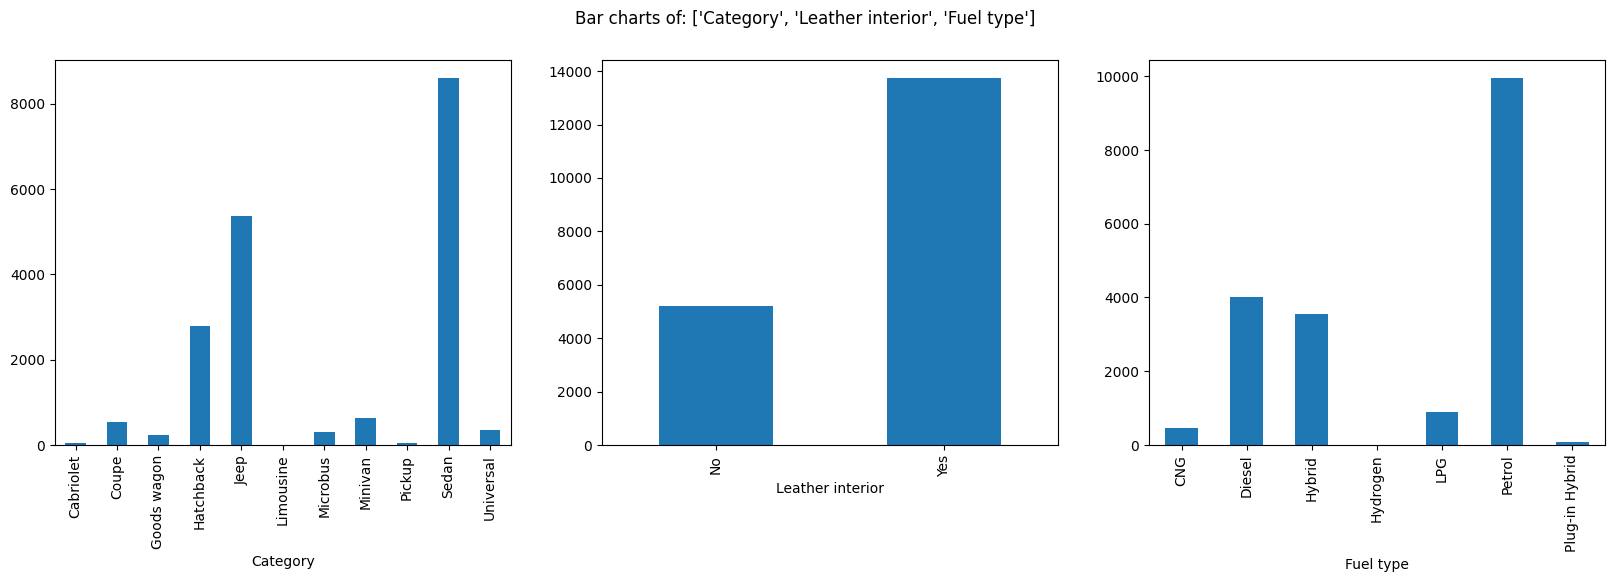

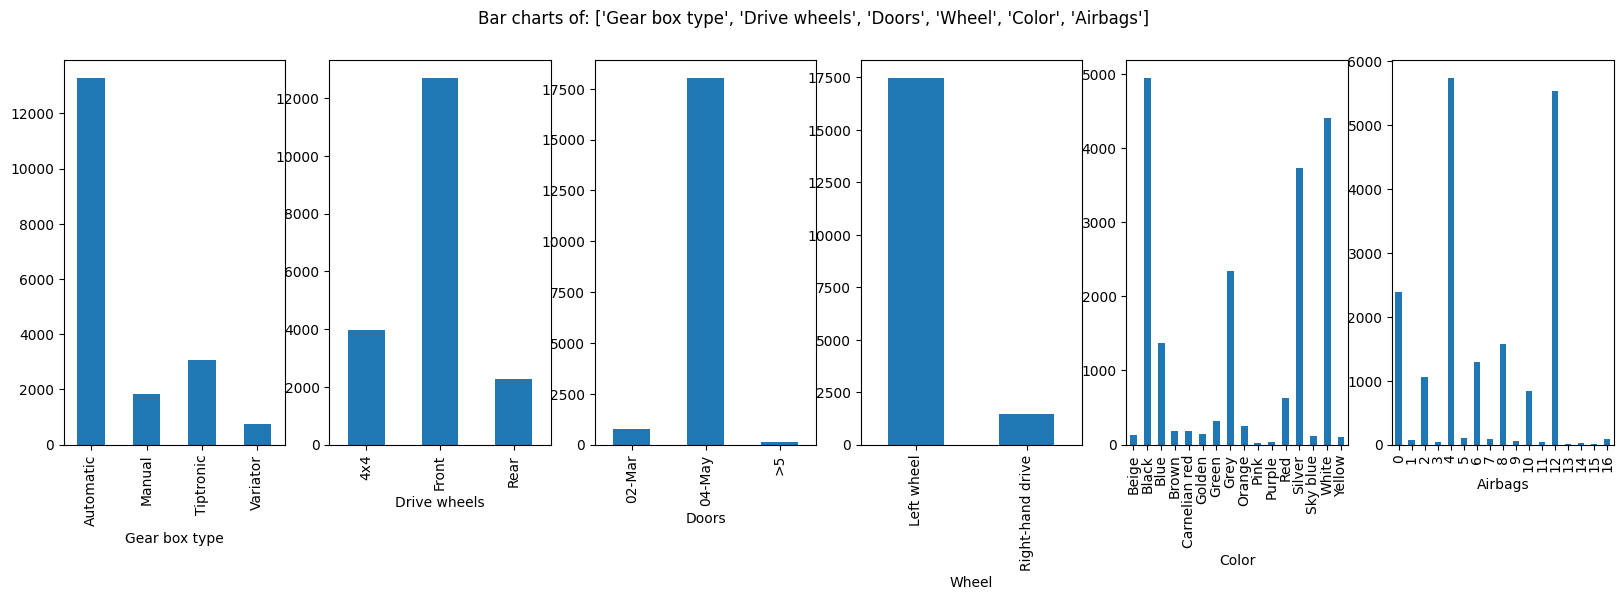

In [142]:
#####################################################################
# Calling the function PlotBarCharts() we have created
PlotBarCharts(inpData=CarData, colsToPlot=['Category','Leather interior','Fuel type'])
PlotBarCharts(inpData=CarData, colsToPlot=['Gear box type','Drive wheels','Doors','Wheel','Color','Airbags'])

## Observations from Step 8 - Visual Exploratory Data Analysis
* Bar Charts have allowed interpretation on the two data columns
* The bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.
* In the ideal bar chart each category has comparable frequency. * Hence, there are enough rows for each category in the data for the ML/AI regression algorithm to learn.
* If there is a column which shows too skewed distribution where there is only one dominant bar and the other categories are present in very low numbers.
* These kind of columns may not be very helpful in machine learning model development.
* We can confirm this with the correlation analysis step coming up,  and take a final call to select or reject the column/data attribute.
* In this dataset, it is worth noting that "Leather interior", "Gear box type", and "Wheel" are skewed. * There is just one bar which is dominating and other one have very less rows.
* Such columns may not be correlated with the target variable because there is no information to learn.
* The algorithms cannot find any rule like when the value is this then the target variable is that.

* Whenever in doubt, always investigate the column further.

* Selected Categorical Variables (**'CHAS', 'RAD'**): Both the categorical variables are selected for further analysis.

## Step 9: Now Visualize distribution of all the Continuous Predictor variables in the data using histograms
* Based on the Basic Exploratory Data Analysis, there are eleven continuous predictor variables 'CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', and 'LSTAT'.  i will change

array([[<Axes: title={'center': 'Levy'}>,
        <Axes: title={'center': 'Manufacturer_encoded'}>],
       [<Axes: title={'center': 'Model_encoded'}>,
        <Axes: title={'center': 'Prod. year'}>],
       [<Axes: title={'center': 'Engine volume'}>,
        <Axes: title={'center': 'Mileage'}>]], dtype=object)

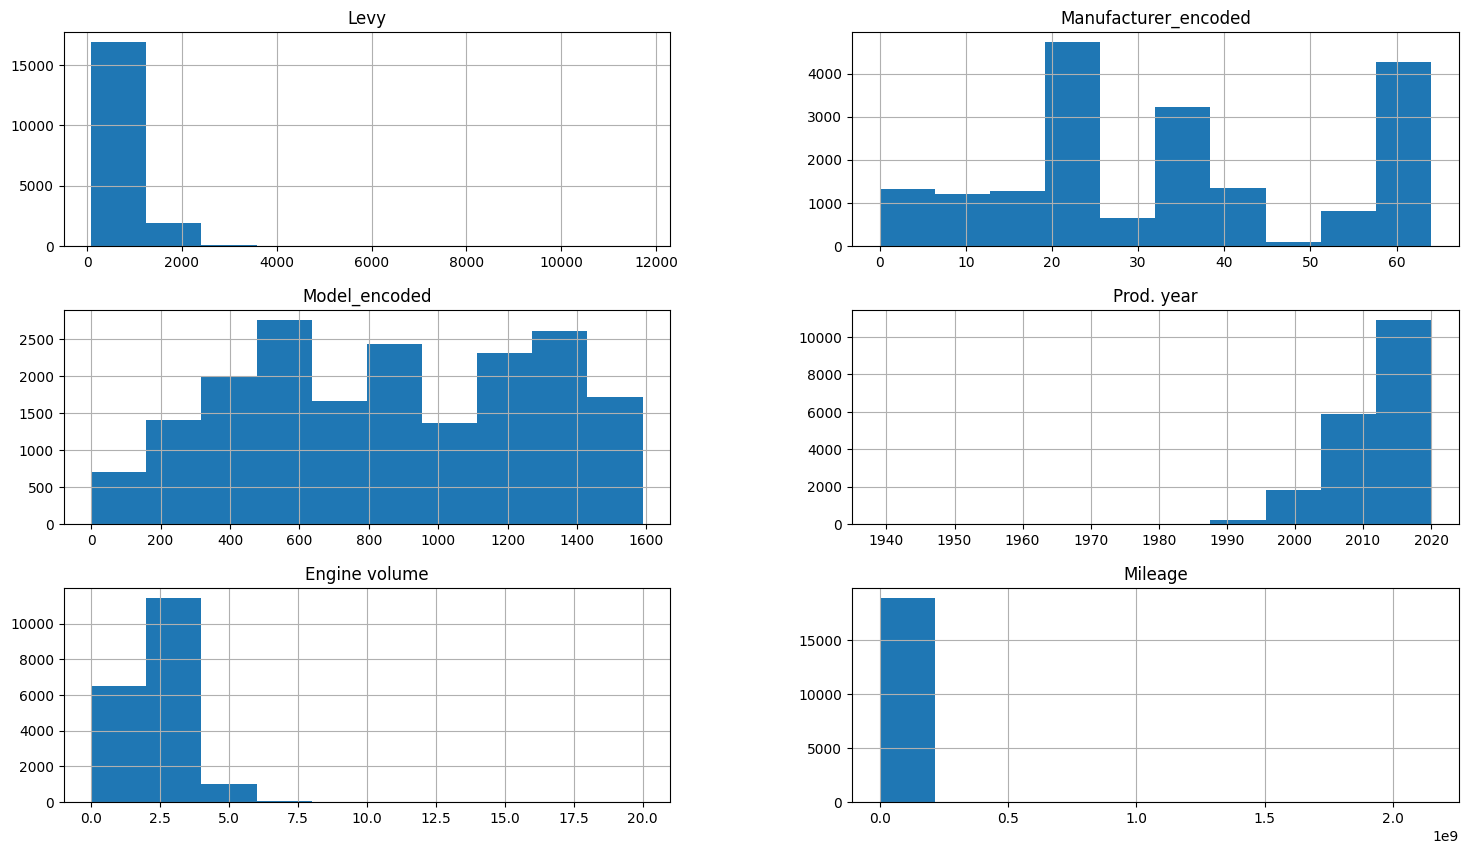

In [143]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Handling missing and special cases
CarData['Levy'] = CarData['Levy'].replace('-', np.nan).astype(float)
CarData['Levy'].fillna(CarData['Levy'].mean(), inplace=True)  # Fill NaN with the mean

# Encoding categorical data
manufacturer_encoder = LabelEncoder()
CarData['Manufacturer_encoded'] = manufacturer_encoder.fit_transform(CarData['Manufacturer'])

model_encoder = LabelEncoder()
CarData['Model_encoded'] = model_encoder.fit_transform(CarData['Model'])



# Converting string values in 'Mileage' and 'Engine volume'
CarData['Mileage'] = CarData['Mileage'].str.replace(" km", "").astype(float)
CarData['Engine volume'] = CarData['Engine volume'].str.replace(" Turbo", "").astype(float)

# Data visualization
CarData.hist(['Levy', 'Manufacturer_encoded', 'Model_encoded', 'Prod. year', 'Engine volume', 'Mileage'], figsize=(18,10))

## Observations from Step 9
* Histogram Interpretation
* Each histograms shows us the data distribution for a single continuous variable.

* The X-axis shows the range of values and Y-axis represent the number of values in that range.
* For example, in the above histogram of "Prod. year", there are around 11,000 values of data that has a prod. year between 2010 to 2020.

* The ideal outcome for histogram is a bell curve or slightly skewed bell curve.
* If there is too much skewness, then outlier removal treatment should be done and the column should be re-examined, and if that also does not solve the problem then only reject the column/data attribute.

* Selected Continuous Variables:

* ID : Selected. The distribution is negative.
* Log_Price : Selected. The distribution is good.
* Levy : Selected. The distribution is negative.
* Manufacturer : Selected. The distribution is good.
* Model : Selected. The distribution is good.
* Prod. year : Selected. The distribution is negative.
* Engine volume : Selected. The distribution is good.
* Mileage : Selected. The distribution is good.

## Step 10: Outlier Analysis
* Outliers are extreme values in the data which are far away from most of the values.
* You can see them as the tails in the histogram.

* Outlier must be treated one column/data attribute at a time.
* As the treatment will be slightly different for each column
* Why I should analyse the outliers?
* Outliers bias the building of machine learning models.
* As the algorithm tries to fit the extreme value, it goes away from majority of the data.
* Outlined below are two options to treat outliers in the data.

* Option-1: Delete the outlier Records. Only if there are just few rows lost.
* Option-2: Impute the outlier values with a logical business value
* Let us find out out the most logical value to be replaced in place of outliers by looking at the histogram.

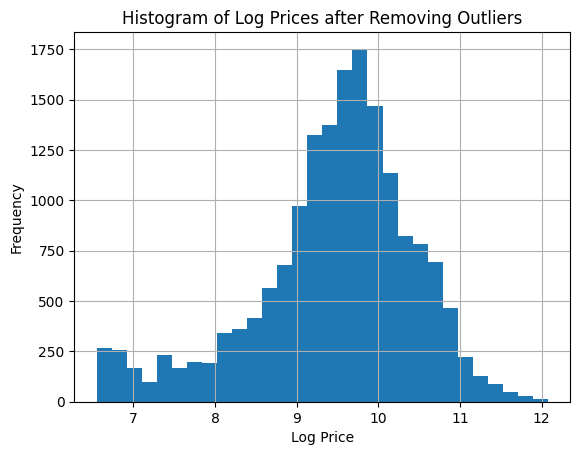

In [144]:
#Replacing outliers for 'Log_Price'
# Finding nearest values to 7000 mark
# Statistical removal of outliers using IQR
Q1 = CarData['Log_Price'].quantile(0.25)
Q3 = CarData['Log_Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
filtered_data = CarData[(CarData['Log_Price'] >= lower_bound) & (CarData['Log_Price'] <= upper_bound)]

# Check results after filtering
plt.figure()
filtered_data['Log_Price'].hist(bins=30)
plt.title('Histogram of Log Prices after Removing Outliers')
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.show()

Observation: Above result shows the nearest logical value is 16983, hence, replacing any value above 7000 with it.

In [145]:
# Replacing outliers with nearest possibe value
CarData['Log_Price'][CarData['Log_Price']>7000] =16983

## Step 11:Visualising Data Distribution after outlier removal

In [146]:
#CarData.hist(['Log_Price'], figsize=(18,5)

## Observation from Step 11
* The distribution has improved after the outlier treatment.
* There is still a tail but it is thick, that means there are many values in that range, hence, it is acceptable.

## Step 12: Missing Values Analysis

* Missing values are treated for each column separately.
* If a column has more than 30% data missing, then missing value treatment cannot be done.
* That column must be rejected because too much information is missing.
* Outlined below are some options for treating missing values in data.
* Delete the missing value rows if there are only few records
* Impute the missing values with MEDIAN value for continuous variables
* Impute the missing values with MODE value for categorical variables
* Interpolate the values based on nearby values
* Interpolate the values based on business logic

In [147]:
# Finding how many missing values are there for each column
CarData.isnull().sum()

ID                      0
Price                   0
Levy                    0
Manufacturer            0
Model                   0
Prod. year              0
Category                0
Leather interior        0
Fuel type               0
Engine volume           0
Mileage                 0
Cylinders               0
Gear box type           0
Drive wheels            0
Doors                   0
Wheel                   0
Color                   0
Airbags                 0
Log_Price               0
Manufacturer_encoded    0
Model_encoded           0
dtype: int64

##Observations from Step 12: Missing Value Analysis
* No missing values in this data!
* So no removal of any data samples(rows) is needed.


## Step 13: Feature Selection (Attribute Selection)

* Now its time to finally choose the best columns(Features) which are correlated to the Target variable.
* This can be done directly by measuring the correlation values or ANOVA analysis or Chi-Square tests.
* However, it is always helpful to visualize the relation between the Target variable/class variable and each of the predictors(features) to get a better sense of data.

* Listed below are some of the techniques used for visualizing relationship between two variables as well as measuring the strength statistically.

* **Visual exploration of relationship between variables**
* Continuous Vs Continuous ---- Scatter Plot
* Categorical Vs Continuous---- Box Plot
* Categorical Vs Categorical---- Grouped Bar Plots
* Statistical measurement of relationship strength between variables
* Continuous Vs Continuous ---- Correlation matrix
* Categorical Vs Continuous---- ANOVA test
* Categorical Vs Categorical--- Chi-Square test

* **For this dataset, the Target variable is Continuous, hence following two scenarios will need attention**

* Continuous Target Variable Vs Continuous Predictor
* Continuous Target Variable Vs Categorical Predictor

## Relationship exploration: Continuous Vs Continuous -- Scatter Charts
* When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship between the two variables using scatter plot and measure the strength of relation using a metric called pearson's correlation value.

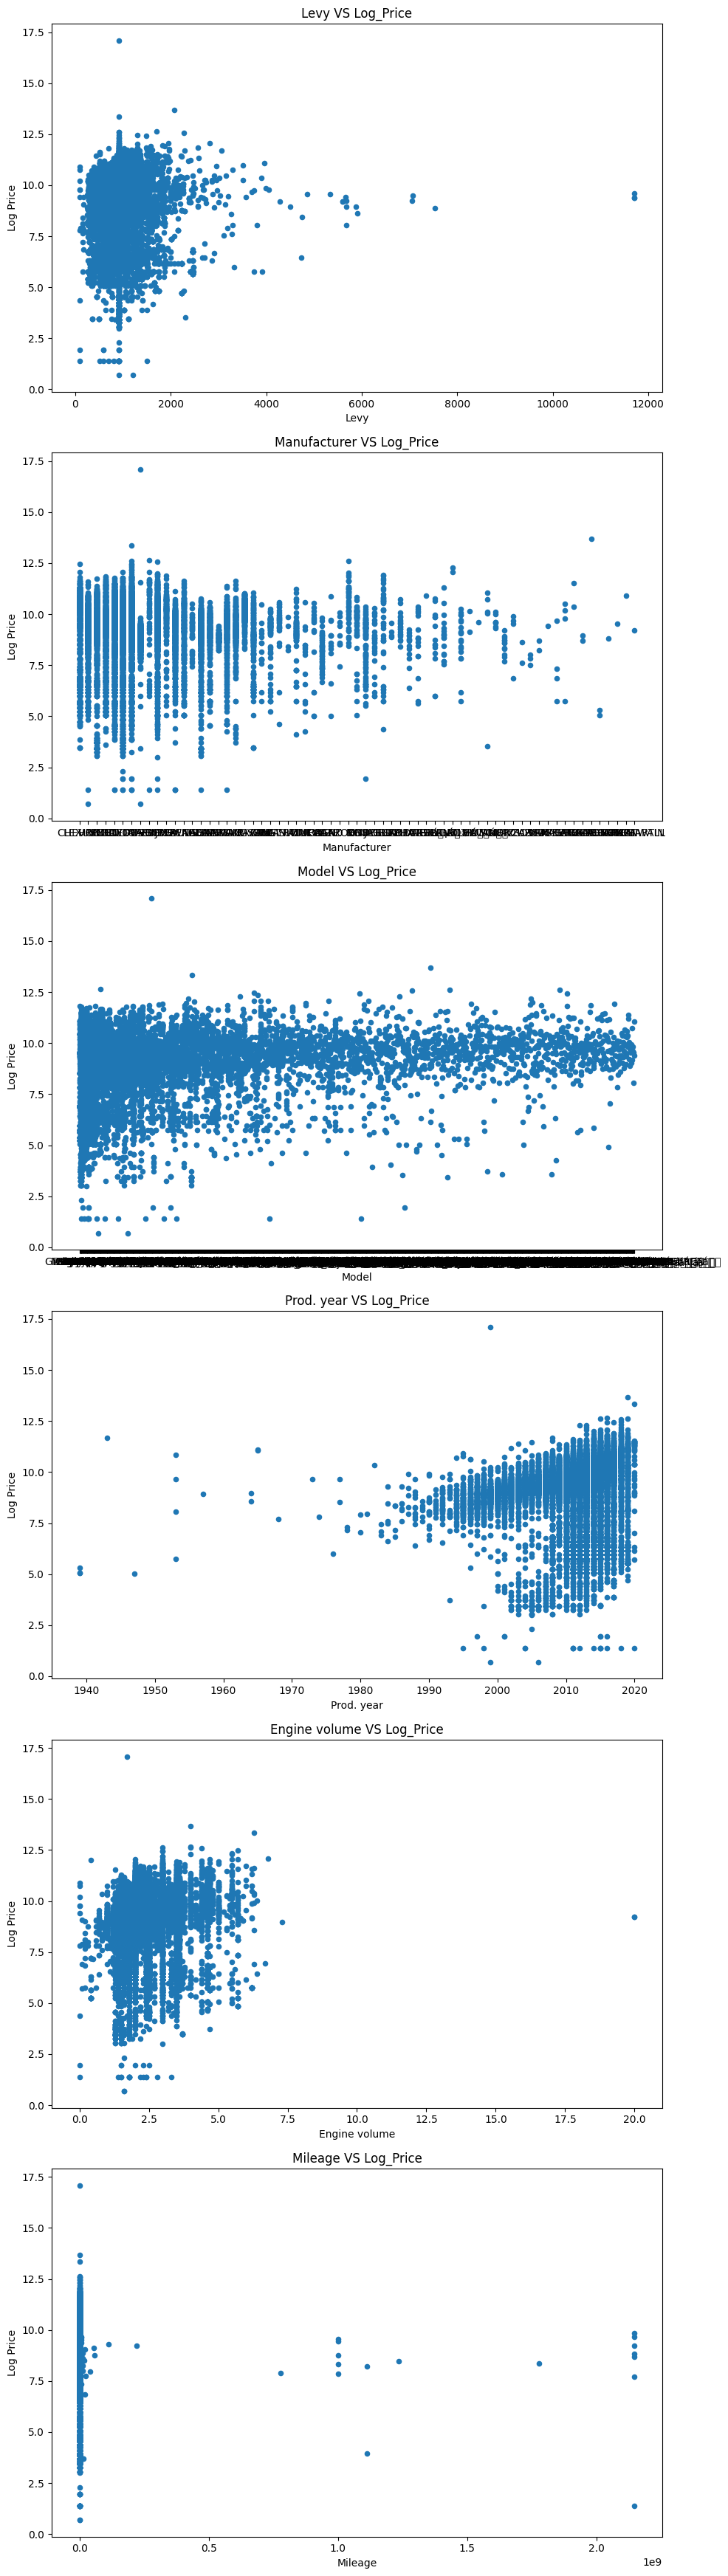

In [148]:
import matplotlib.pyplot as plt

# Assuming CarData is already loaded and the necessary preprocessing has been done
ContinuousCols = ['Log_Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Engine volume', 'Mileage']

# Set up the matplotlib figure and axes
fig, axes = plt.subplots(nrows=len(ContinuousCols) - 1, ncols=1, figsize=(10, 5 * len(ContinuousCols)))

# Loop through each predictor (excluding 'Log_Price' since it's the target)
for i, predictor in enumerate([col for col in ContinuousCols if col != 'Log_Price']):
    CarData.plot.scatter(x=predictor, y='Log_Price', ax=axes[i], title=predictor + " VS Log_Price")
    axes[i].set_xlabel(predictor)
    axes[i].set_ylabel('Log Price')

plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()  # Display all plots

## Scatter charts interpretation
* What should you look for in these scatter charts?

* **Trend.** You should try to see if there is a visible trend or not. There could be three scenarios

* **Increasing Trend**: This means both variables are positively correlated. In simpler terms, they are directly proportional to each other, if one value increases, other also increases. This is good for ML model building!

* **Decreasing Trend:** This means both variables are negatively correlated. In simpler terms, they are inversely proportional to each other, if one value increases, other decreases. This is also good for ML model building!

* **No Trend**: You cannot see any clear increasing or decreasing trend. This means there is no correlation between the variables. Hence that predictor/feature may not be the best one for ML model building.

* Based on this chart we can get a good idea about the predictor, if it will be useful or not. You confirm this by looking at the correlation value in the next step.

## Step 14: Statistical Feature Selection (Continuous Vs Continuous) using Correlation value

* Pearson's correlation coefficient is a powerful metric for doing this.
* It can simply be calculated as the covariance between two features  x and  y
  (numerator) divided by the product of their standard deviations (denominator):

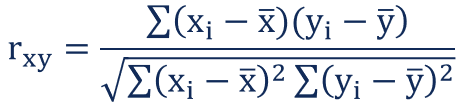

* This value can be calculated only between two numeric columns
Correlation between [-1,0) means inversely proportional, the scatter plot will show a downward trend
* Correlation between (0,1] means directly proportional, the scatter plot will show a upward trend
* Correlation near {0} means No relationship, the scatter plot will show no clear trend.
* If Correlation value between two variables is > 0.5 in magnitude, it indicates good relationship the sign does not matter
* We observe the correlations between Target variable and all other predictor variables(s) to check which columns/features/predictors are actually related to the target variable in question.

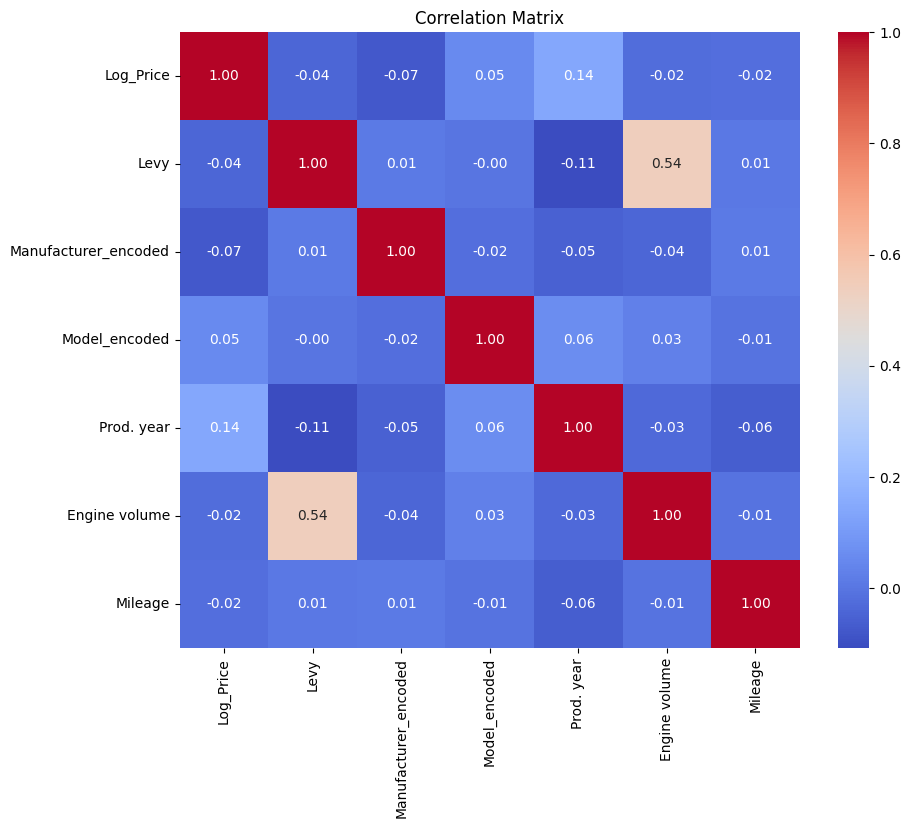

,Log_Price,Levy,Manufacturer_encoded,Model_encoded,Prod. year,Engine volume,Mileage
Log_Price,1.000000,-0.042277,-0.073322,0.054874,0.139292,-0.021627,-0.019186
Levy,-0.042277,1.000000,0.013061,-0.001549,-0.107800,0.537900,0.008378
Manufacturer_encoded,-0.073322,0.013061,1.000000,-0.017196,-0.051567,-0.041471,0.012553
Model_encoded,0.054874,-0.001549,-0.017196,1.000000,0.064736,0.027045,-0.008184
Prod. year,0.139292,-0.107800,-0.051567,0.064736,1.000000,-0.032427,-0.064058
Engine volume,-0.021627,0.537900,-0.041471,0.027045,-0.032427,1.000000,-0.006292
Mileage,-0.019186,0.008378,0.012553,-0.008184,-0.064058,-0.006292,1.000000


In [149]:
# Calculating correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Calculating correlation matrix
ContinuousCols = ['Log_Price', 'Levy', 'Manufacturer_encoded', 'Model_encoded', 'Prod. year', 'Engine volume', 'Mileage']
CorrelationData = CarData[ContinuousCols].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(CorrelationData, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()
CorrelationData

In [150]:
# Filtering only those columns where absolute correlation > 0.05 with Target Variable
# Change to 0.05 based on matrix results
# reduce the 0.05 threshold if no variable is selected
significant_features = CorrelationData['Log_Price'][abs(CorrelationData['Log_Price']) > 0.05]

significant_features

Log_Price               1.000000
Manufacturer_encoded   -0.073322
Model_encoded           0.054874
Prod. year              0.139292
Name: Log_Price, dtype: float64

## Observations from Step 14
* Final selected Continuous columns:

* **'Log_Price', 'Manufacturer', 'Model', 'Prod. year'**

# Step 15:  Relationship exploration: Categorical Vs Continuous -- Box Plots
* When the target variable is Continuous and the predictor variable is Categorical we analyze the relation using Boxplots,  and
* Measure the strength of relation using Anova test.

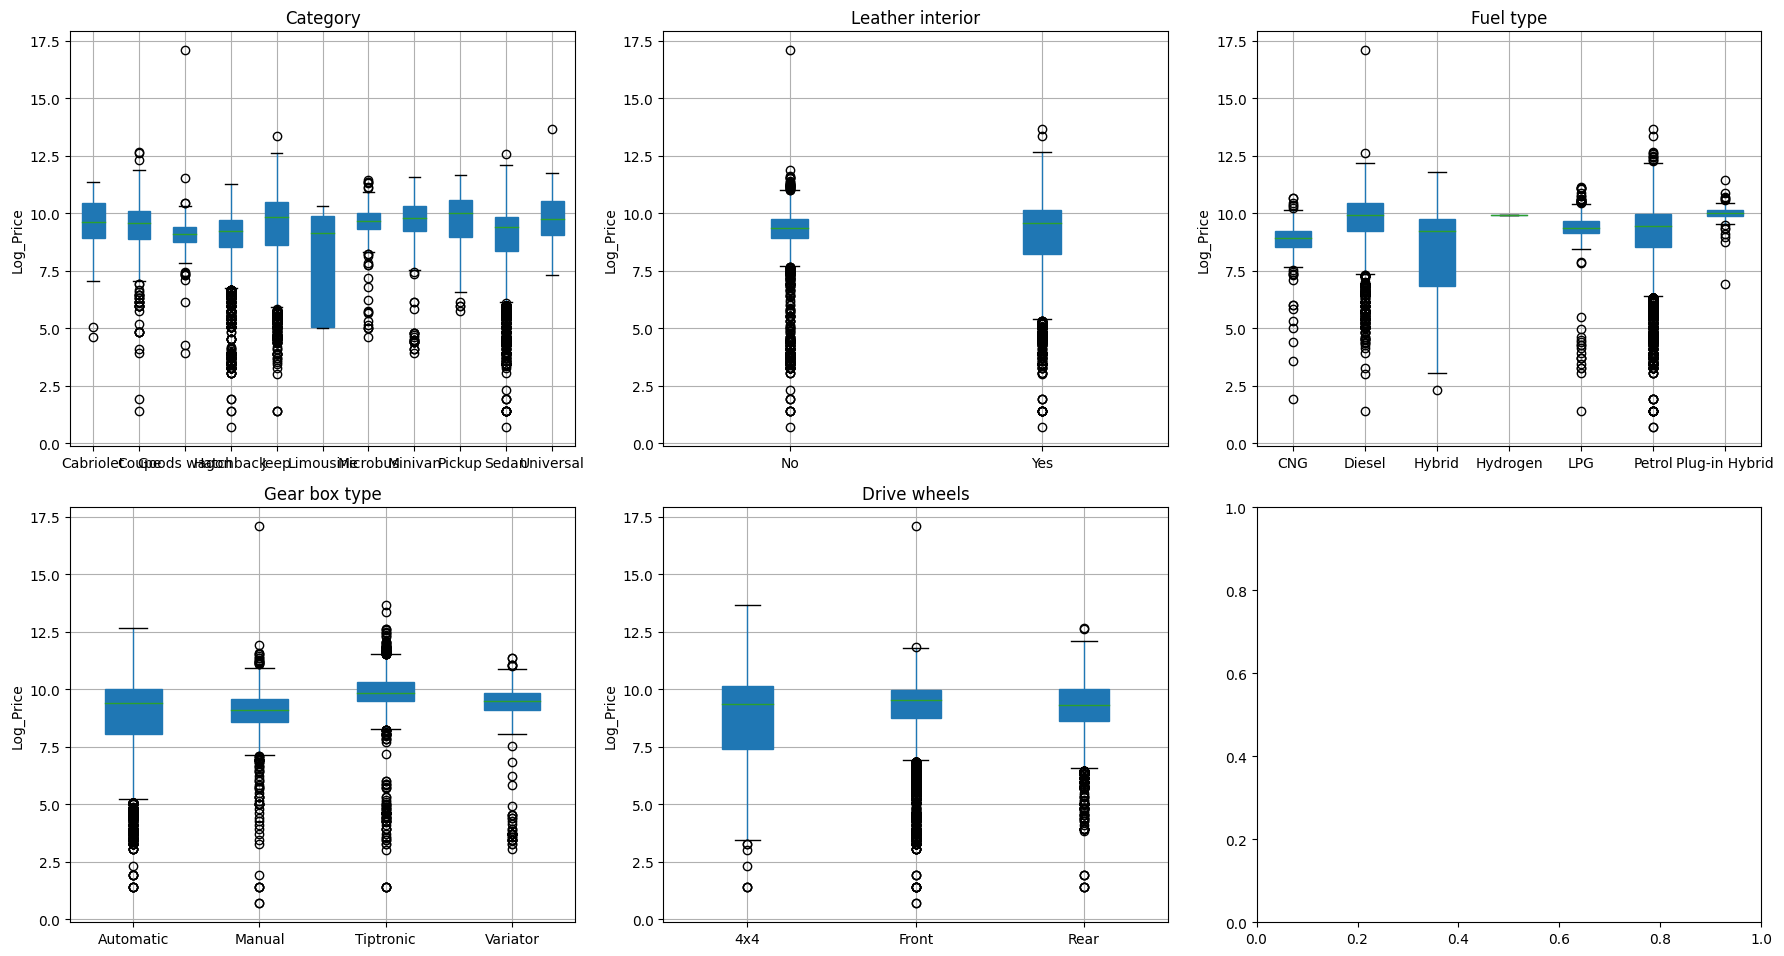

In [151]:
import matplotlib.pyplot as plt

# List of categorical columns
CategoricalColsList = ['Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels']

# Determine the number of rows needed for the subplots
nrows = len(CategoricalColsList) // 3 + (len(CategoricalColsList) % 3 > 0)
fig, PlotCanvas = plt.subplots(nrows=nrows, ncols=3, figsize=(18, 5 * nrows))  # Adjusted for multiple rows if needed

# Flatten the axes array if more than one row
if nrows > 1:
    PlotCanvas = PlotCanvas.ravel()
else:
    PlotCanvas = [PlotCanvas]

# Creating box plots for each categorical predictor against the Target Variable "Log_Price"
for i, PredictorCol in enumerate(CategoricalColsList):
    CarData.boxplot(column='Log_Price', by=PredictorCol, vert=True, ax=PlotCanvas[i], patch_artist=True)
    PlotCanvas[i].set_title(PredictorCol)
    PlotCanvas[i].set_xlabel('')
    PlotCanvas[i].set_ylabel('Log_Price')

# Adjust layout, clear the titles (set by boxplot by default), and show plot
plt.tight_layout()
plt.suptitle('')
plt.show()


##Observations from Step 15: Box-Plots interpretation

* What should you look for in these box plots?

* These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

* If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

* On the other hand if the distribution is different for each category(the boxes are not in same line!). It hints that these variables might be correlated with Log_Price.

* For this datadata, both the categorical predictors looks correlated with the Target variable.

We confirm this by looking at the results of ANOVA test below

## Step 16: Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

* Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

* Assumption(H0) Null Hypothesis: There is NO relation between the given variables (i.e.
* The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)
* ANOVA Test result: Probability of H0 (Null Hypothesis being true

In [152]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results #####\n')
    for predictor in CategoricalPredictorList:
        # Creating a list of series, dropping any NaN values that could interfere with ANOVA
        CategoryGroupLists = [group.dropna() for name, group in inpData.groupby(predictor)[TargetVariable]]

        # Performing the ANOVA test
        AnovaResults = f_oneway(*CategoryGroupLists)

        # Checking if the ANOVA test result P-Value is less than 0.05
        if AnovaResults[1] < 0.05:
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return SelectedPredictors


In [153]:
#Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels']
FunctionAnova(inpData=CarData,
              TargetVariable='Log_Price',
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results #####

Category is correlated with Log_Price | P-Value: 1.568619676476271e-111
Leather interior is correlated with Log_Price | P-Value: 0.0020743181243794173
Fuel type is correlated with Log_Price | P-Value: 9.088848648088443e-259
Gear box type is correlated with Log_Price | P-Value: 4.150818363223648e-211
Drive wheels is correlated with Log_Price | P-Value: 1.4043384460144667e-22


['Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels']

##Observations from Step 16
* The results of ANOVA confirm our visual analysis using box plots above.

* All categorical variables are correlated with the Target variable.
* This is something you can guess by looking at the box plots!

* Final selected Categorical columns:

['Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels']

## Selecting final Predictors/Features for building Machine Learning/AI model.
* Based on the extensive tests with exploratory data analysis, we can select the final features/predictors/columns for machine learning model building as:
* **'Log_Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color', 'Airbags'**

In [154]:

import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Do label encoding for columns which has string values
Category_encoder = LabelEncoder()
CarData['Category'] = Category_encoder.fit_transform(CarData['Category'])

Fuel_type_encoder = LabelEncoder()
CarData['Fuel type'] = Fuel_type_encoder.fit_transform(CarData['Fuel type'])

Gear_encoder = LabelEncoder()
CarData['Gear box type'] = Gear_encoder.fit_transform(CarData['Gear box type'])

Wheel_encoder = LabelEncoder()
CarData['Wheel'] = Wheel_encoder.fit_transform(CarData['Wheel'])

Drive_Wheel_encoder = LabelEncoder()
CarData['Drive wheels'] = Drive_Wheel_encoder.fit_transform(CarData['Drive wheels'])

Doors_encoder = LabelEncoder()
CarData['Doors'] = Doors_encoder.fit_transform(CarData['Doors'])

Leather_encoder = LabelEncoder()
CarData['Leather interior'] = Leather_encoder.fit_transform(CarData['Leather interior'])

SelectedColumns = [
    'Price', 'Manufacturer_encoded', 'Model_encoded', 'Prod. year', 'Category',
    'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels'
]
# Selecting final columns
DataForML=CarData[SelectedColumns]


,Price,Manufacturer_encoded,Model_encoded,Prod. year,Category,Leather interior,Fuel type,Gear box type,Drive wheels
0,13328,32,1242,2010,4,1,2,0,0
1,16621,8,658,2011,4,0,5,2,0
2,8467,21,684,2006,3,0,5,3,1
3,3607,16,661,2011,4,1,2,0,0
4,11726,21,684,2014,3,1,5,0,1


In [194]:
DataForML['Model_encoded'].unique().max()
# manufacturer is 0 to 64
# model uis 0 to 1589
# category is 0 to10
# leather interior is 0 to 1
# Drive wheels is 0 to 1
# fuel_type is 0 to 6
# gear box type is 0 to 3
# prod year is in year format only



1589

In [155]:
# Saving this final data subset for reference during deployment
DataForML.to_pickle('DataForML.pkl')


# Loading DataFrame from a pickle file
loaded_df = pd.read_pickle('DataForML.pkl')
print(loaded_df)

       Price  Manufacturer_encoded  Model_encoded  Prod. year  Category  \
0      13328                    32           1242        2010         4   
1      16621                     8            658        2011         4   
2       8467                    21            684        2006         3   
3       3607                    16            661        2011         4   
4      11726                    21            684        2014         3   
...      ...                   ...            ...         ...       ...   
18919   8467                    36            385        1999         1   
18920  15681                    23           1334        2011         9   
18921  26108                    23           1442        2010         4   
18922   5331                     8            456        2007         4   
18923    470                    23           1334        2012         9   

       Leather interior  Fuel type  Gear box type  Drive wheels  
0                     1          

## Step 17: Data Pre-processing for Machine Learning Model Building or Model Development
* List of steps that needs to be performed on predictor variables before data can be used for machine learning

* Converting each Ordinal Categorical columns to numeric
* Converting Binary nominal Categorical columns to numeric using 1/0 mapping
* Converting all other nominal categorical columns to numeric using pd.get_dummies()
* Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks
* Converting the ordinal variable to numeric - In this data there is no Ordinal categorical variable.
* Converting the binary nominal variable to numeric using 1/0 mapping: There is no binary nominal variable in string format in this data

## Converting the nominal variable to numeric using get_dummies()

In [156]:
# Treating all the nominal variables at once using dummy variables
DataForML_dummies = pd.get_dummies(DataForML, drop_first=True)

# Adding Target Variable to the data
DataForML_dummies['Log_price']=CarData['Log_price']

# Printing sample rows
DataForML_dummies.head()

,Price,Manufacturer_encoded,Model_encoded,Prod. year,Category,Leather interior,Fuel type,Gear box type,Drive wheels
0,13328,32,1242,2010,4,1,2,0,0
1,16621,8,658,2011,4,0,5,2,0
2,8467,21,684,2006,3,0,5,3,1
3,3607,16,661,2011,4,1,2,0,0
4,11726,21,684,2014,3,1,5,0,1


In [157]:
DataForML_dummies.dtypes



Price                   int64
Manufacturer_encoded    int64
Model_encoded           int64
Prod. year              int64
Category                int64
Leather interior        int64
Fuel type               int64
Gear box type           int64
Drive wheels            int64
dtype: object

In [158]:
# Saving the transformed DataFrame for easy loading in future sessions
DataForML_dummies.to_pickle('DataForML_dummies.pkl')

## Step 18: Machine Learning Model Development:
* Splitting the data into Training and Testing sample
* We dont use the full data for creating the model (training data).
* Some data is randomly selected and kept aside for checking how good the model is.
* This is known as Testing Data and the remaining data is called Training data on which the model is built.
* Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [159]:
# Printing all the column names for our reference
DataForML_dummies.columns

Index(['Price', 'Manufacturer_encoded', 'Model_encoded', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Gear box type',
       'Drive wheels'],
      dtype='object')

In [160]:
import pandas as pd
from sklearn.model_selection import train_test_split

TargetVariable='Price' #change from here to the bottom the price to log price ok w8
Predictors=['Manufacturer_encoded', 'Model_encoded', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Gear box type',
       'Drive wheels']


X=DataForML_dummies[Predictors].values
y=DataForML_dummies[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)


## Step 19: Standardization/Normalization of data
* You can choose not to run this step if you want to compare the resultant accuracy of this transformation with the accuracy of raw data (Optional Step)

* However, if you are using KNN or Neural Networks, then this step becomes necessary.

In [161]:
### Standardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [162]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13246, 8)
(13246,)
(5678, 8)
(5678,)


## Step 20: Multiple Linear Regression Algorithm For ML/AI model building

In [163]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig, pred):
    try:
        MAPE = np.mean(100 * (np.abs(orig - pred) / orig))
        accuracy = 100 - MAPE
    except ZeroDivisionError:
        accuracy = np.nan  # Set accuracy to NaN if division by zero occurs
    return accuracy

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.0010605922871913531

##### Model Validation and Accuracy Calculations ##########
   Manufacturer_encoded  Model_encoded  Prod. year  Category  \
0              0.437500       0.679043    0.913580       0.9   
1              0.437500       0.679043    0.913580       0.9   
2              0.359375       0.839522    0.938272       0.9   
3              0.906250       0.942731    0.765432       0.3   
4              0.250000       0.894273    0.728395       0.6   

   Leather interior  Fuel type  Gear box type  Drive wheels  Price  \
0               1.0   0.833333       0.000000           0.5  11604   
1               1.0   0.833333       0.000000           0.5    470   
2               1.0   0.833333       0.000000           0.5  20162   
3               0.0   0.833333       0.000000           0.5   7527   
4               0.0   0.166667       0.333333           1.0  18817   

   PredictedPrice  
0          8925.0  
1          8925.0  
2          9401.0  
3 

# Decision Tree Regressor

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.994623835766407

##### Model Validation and Accuracy Calculations ##########
   Manufacturer_encoded  Model_encoded  Prod. year  Category  \
0              0.437500       0.679043    0.913580       0.9   
1              0.437500       0.679043    0.913580       0.9   
2              0.359375       0.839522    0.938272       0.9   
3              0.906250       0.942731    0.765432       0.3   
4              0.250000       0.894273    0.728395       0.6   

   Leather interior  Fuel type  Gear box type  Drive wheels  Price  \
0               1.0   0.833333       0.000000           0.5  11604   
1               1.0   0.833333       0.000000           0.5    470   
2               1.0   0.833333       0.000000           0.5  20162   
3               0.0   0.833333       0.000000           0.5   7527   
4               0.0   0.166667       0.333333           1.0  18817   

   PredictedPrice  
0         12126.0  
1   

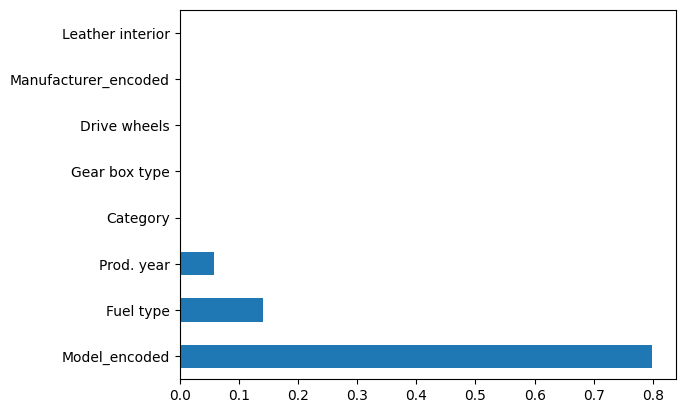

In [164]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting/Visualising the Decision Tree

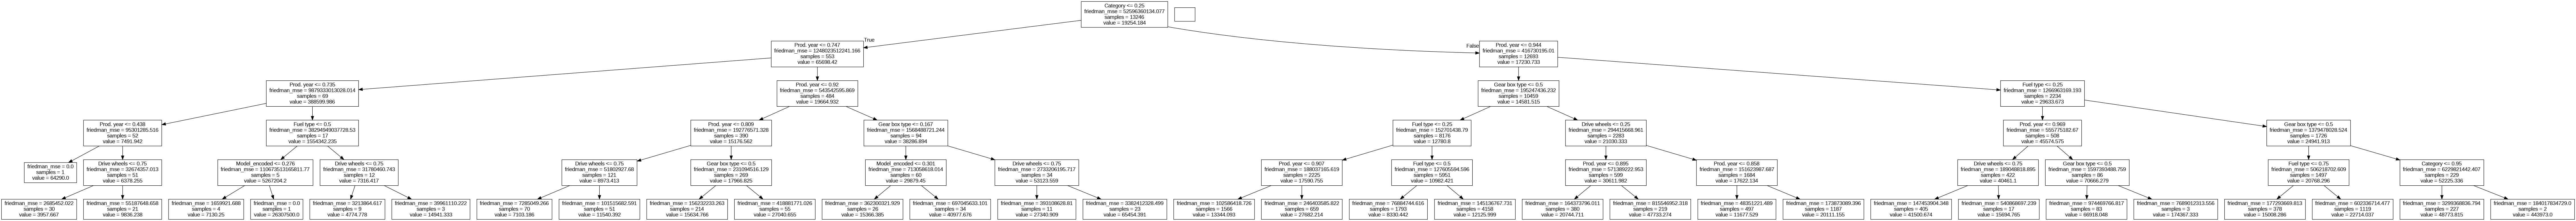

In [165]:

# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(RegModel, out_file=None,
                                feature_names=Predictors, class_names=TargetVariable)

# printing the rules
#print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=2000,height=2000)
# Double click on the graph to zoom in

# Random Forest Regressor

RandomForestRegressor(criterion='friedman_mse', max_depth=4, n_estimators=400)
R2 Value: 0.2596844518361815

##### Model Validation and Accuracy Calculations ##########
   Manufacturer_encoded  Model_encoded  Prod. year  Category  \
0              0.437500       0.679043    0.913580       0.9   
1              0.437500       0.679043    0.913580       0.9   
2              0.359375       0.839522    0.938272       0.9   
3              0.906250       0.942731    0.765432       0.3   
4              0.250000       0.894273    0.728395       0.6   

   Leather interior  Fuel type  Gear box type  Drive wheels  Price  \
0               1.0   0.833333       0.000000           0.5  11604   
1               1.0   0.833333       0.000000           0.5    470   
2               1.0   0.833333       0.000000           0.5  20162   
3               0.0   0.833333       0.000000           0.5   7527   
4               0.0   0.166667       0.333333           1.0  18817   

   PredictedPrice  
0    

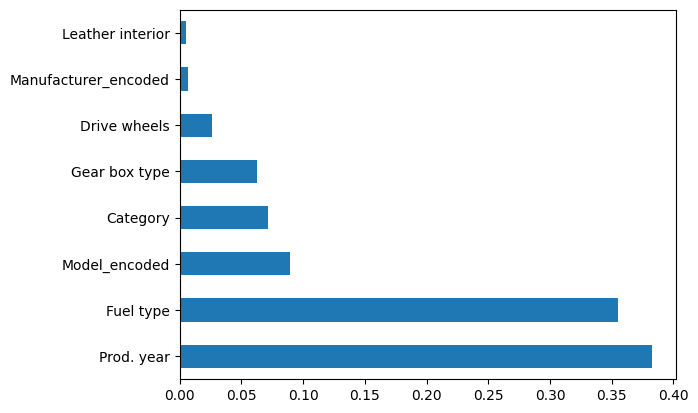

In [166]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=4, n_estimators=400,criterion='friedman_mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting One of the Decision Tree in Random Forest Regressor

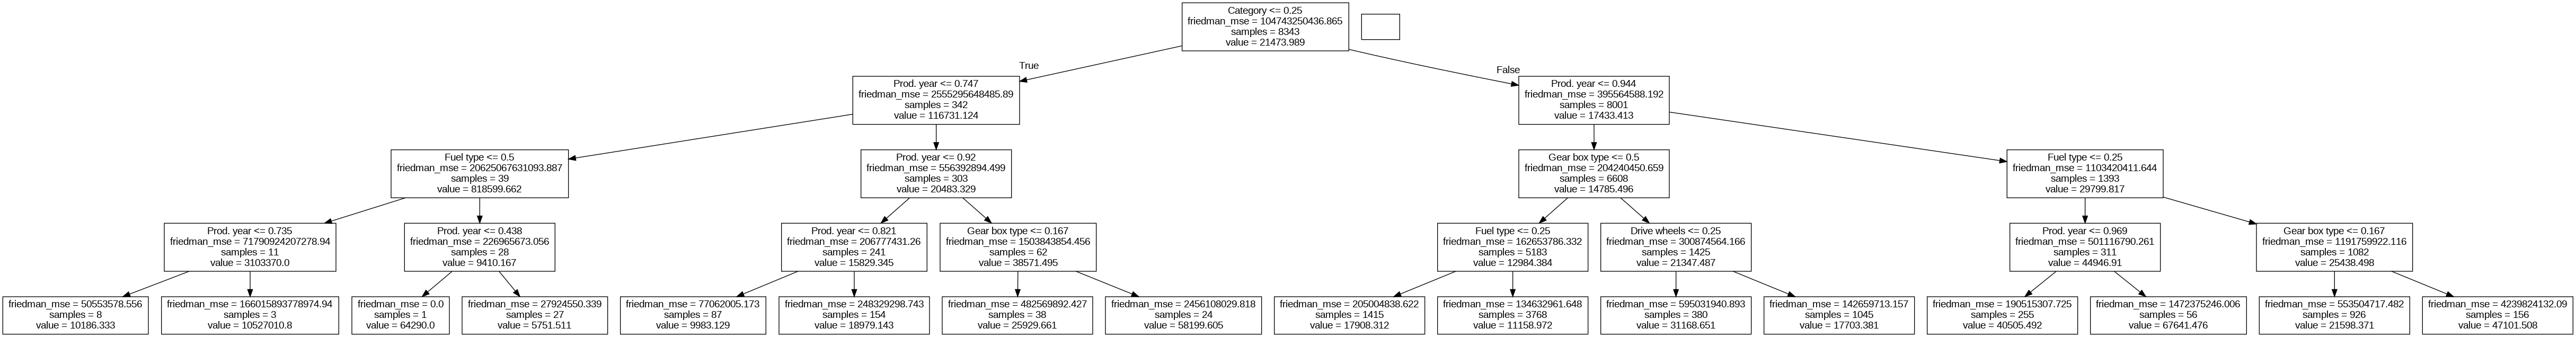

In [167]:
# Plotting a single Decision Tree from Random Forest
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data for the 6th Decision Tree in Random Forest
dot_data = tree.export_graphviz(RegModel.estimators_[5] , out_file=None, feature_names=Predictors, class_names=TargetVariable)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=2000,height=2000)
# Double click on the graph to zoom in


## Step 21: AdaBoost Algorithm For ML/AI model building

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=100)
R2 Value: 0.9319316830919415

##### Model Validation and Accuracy Calculations ##########
   Manufacturer_encoded  Model_encoded  Prod. year  Category  \
0              0.437500       0.679043    0.913580       0.9   
1              0.437500       0.679043    0.913580       0.9   
2              0.359375       0.839522    0.938272       0.9   
3              0.906250       0.942731    0.765432       0.3   
4              0.250000       0.894273    0.728395       0.6   

   Leather interior  Fuel type  Gear box type  Drive wheels  Price  \
0               1.0   0.833333       0.000000           0.5  11604   
1               1.0   0.833333       0.000000           0.5    470   
2               1.0   0.833333       0.000000           0.5  20162   
3               0.0   0.833333       0.000000           0.5   7527   
4               0.0   0.166667       0.333333     

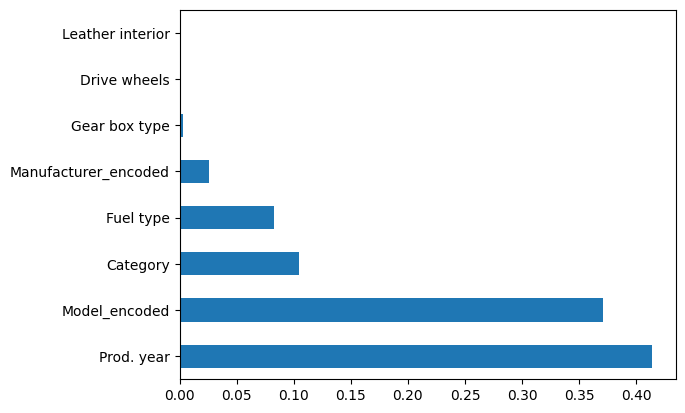

In [168]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# XGBoost Regressor

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)
R2 Value: 0.1472039224528986

##### Model Validation and Accuracy Calculations ##########
   Manufacturer_encoded  Model_encoded  Prod. year  Category  \
0              0.437500       0.679043    0.913580       0.9   
1              0.437500       

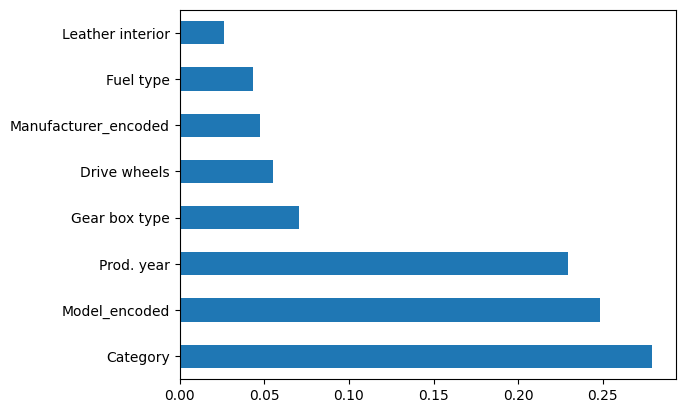

In [169]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

#Plotting a single Decision tree out of XGBoost

<Axes: >

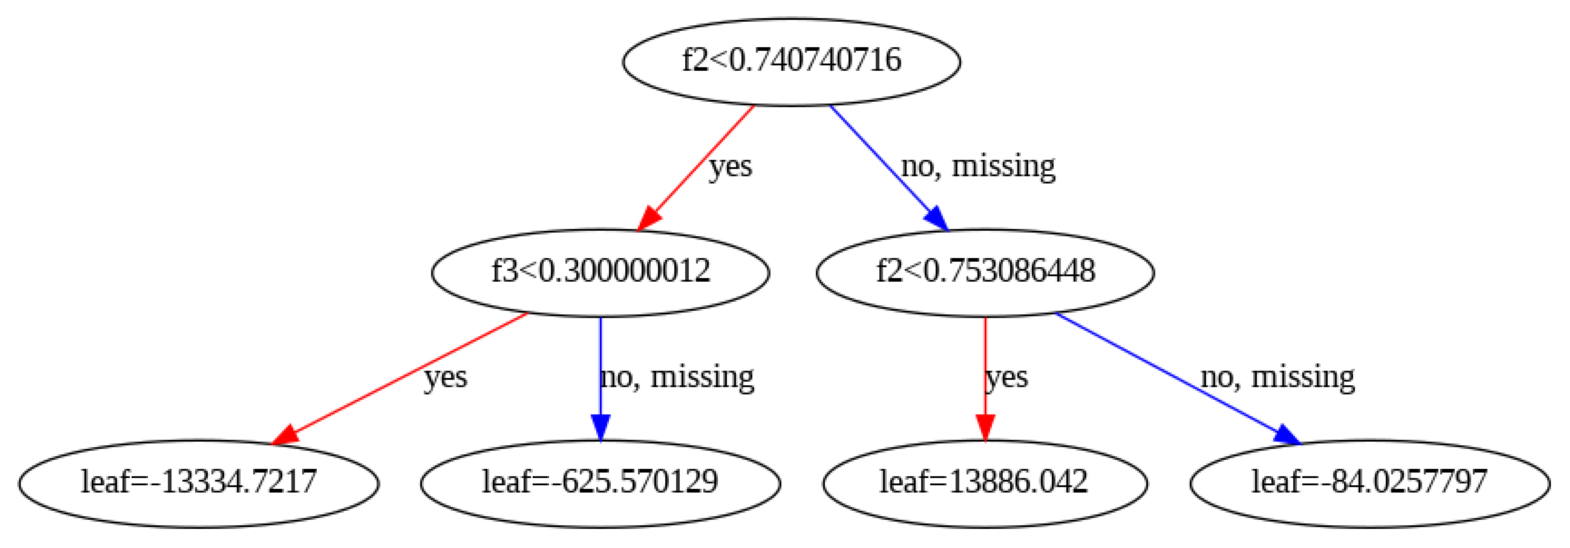

In [170]:
#Plotting a single Decision tree out of XGBoost
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)

# K-Nearest Neighbor(KNN)

In [171]:
#kNN
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.556103276540127

##### Model Validation and Accuracy Calculations ##########
   Manufacturer_encoded  Model_encoded  Prod. year  Category  \
0              0.437500       0.679043    0.913580       0.9   
1              0.437500       0.679043    0.913580       0.9   
2              0.359375       0.839522    0.938272       0.9   
3              0.906250       0.942731    0.765432       0.3   
4              0.250000       0.894273    0.728395       0.6   

   Leather interior  Fuel type  Gear box type  Drive wheels  Price  \
0               1.0   0.833333       0.000000           0.5  11604   
1               1.0   0.833333       0.000000           0.5    470   
2               1.0   0.833333       0.000000           0.5  20162   
3               0.0   0.833333       0.000000           0.5   7527   
4               0.0   0.166667       0.333333           1.0  18817   

   PredictedPrice  
0          7129.0  
1          7129.0  
2         

# Support Vector Machine (SVM) Regressor

In [172]:
# Support Vector Machines(SVM)
from sklearn import svm
RegModel = svm.SVR(C=50, kernel='rbf', gamma=0.01)

# Printing all the parameters
print(RegModel)

# Creating the model on Training Data
SVM=RegModel.fit(X_train,y_train)
prediction=SVM.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2)) # working

SVR(C=50, gamma=0.01)
R2 Value: -0.0006706257607895783

##### Model Validation and Accuracy Calculations ##########
   Manufacturer_encoded  Model_encoded  Prod. year  Category  \
0              0.437500       0.679043    0.913580       0.9   
1              0.437500       0.679043    0.913580       0.9   
2              0.359375       0.839522    0.938272       0.9   
3              0.906250       0.942731    0.765432       0.3   
4              0.250000       0.894273    0.728395       0.6   

   Leather interior  Fuel type  Gear box type  Drive wheels  Price  \
0               1.0   0.833333       0.000000           0.5  11604   
1               1.0   0.833333       0.000000           0.5    470   
2               1.0   0.833333       0.000000           0.5  20162   
3               0.0   0.833333       0.000000           0.5   7527   
4               0.0   0.166667       0.333333           1.0  18817   

   PredictedPrice  
0         13236.0  
1         13236.0  
2         13295.0 

# Step 21: Model Deployment
* Deployment of the Model - Based on the above trials we select that algorithm which produces the best average accuracy.

* In this case, multiple algorithms have produced similar kind of average accuracy. Hence, we can choose any one of them.

* I am choosing XGboost as the final model it has the highest accuracy!

* In order to deploy the model we follow steps outlined next.

* Train/Build the model again using 100% data available

* Save the model as a serialized file which can be stored anywhere.

* Create a python function which gets integrated with front-end Viewer(GUI/ Website etc.) to take all the inputs and returns the prediction

* Choosing only the most important variables

* Its beneficial to keep lesser number of predictors for the model while deploying it in production.

* The lesser predictors you keep, the better it is, because the model will be less dependent on predictor columns/features, hence, more stable.

* This is important specially when the data is high dimensional(too many predictor columns/features).

* For this dataset, the most important predictor variables are 'LSTAT', 'RM', and 'PTRATIO'. As these are consistently on top of the variable importance chart for every algorithm. Hence choosing these as final set of predictor variables will result in better house price prediction platform/system.

In [173]:
# Separate Target Variable and Predictor Variables
TargetVariable='Price'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['Manufacturer_encoded', 'Model_encoded', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Gear box type',
       'Drive wheels'] # fix here is this wrong??

X=DataForML_dummies[Predictors].values
y=DataForML_dummies[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(18924, 8)
(18924,)


# Cross validating the final model accuracy with less predictors

In [174]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# choose from different tunable hyper parameters
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [-1531.49733665  -902.70354904 -1625.44437    -2487.90313304
 -3351.01352593 -2390.27747235 -2243.266942   -2202.03814409
 -1503.54056267 -1256.39177593]

Final Average Accuracy of the model: -1949.41


# Step 22: Retraining the final model using 100% data

In [175]:
# Training the model on 100% Data available
Final_XGB_Model=RegModel.fit(X,y)

# Step 23: Save the model as a serialized file which can be stored anywhere

In [176]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_XGB_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_XGB_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /content/drive/MyDrive/Capstone_Project


# Step 24: Create a python function

In [177]:
from re import IGNORECASE
# This Function can be called from any from any front end tool/website

def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]

    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input

    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    #InputData=InputData.append(DataForML, ignore_index=True)
    InputData = pd.concat([InputData, DataForML], ignore_index=True)

    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)

    # Maintaining the same order of columns as it was during the model training
    Predictors=['Manufacturer_encoded', 'Model_encoded', 'Prod. year', 'Category',
    'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels']

    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]

    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)

    # Loading the Function from pickle file
    import pickle
    with open('Final_XGB_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()

    # Genrating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(PredictionResult)

# Step 25: Calling the function for some new data

In [178]:
# Calling the function for some new data
list1 = [10000, 3, 2, 2010, 4, 1, 1, 1, 1]
list2 = [12000, 3, 2, 2022, 2, 0, 0, 0, 0]
NewSampleData=pd.DataFrame(data=[list1,list2],columns=['Price', 'Manufacturer_encoded', 'Model_encoded', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels'])


print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData=NewSampleData)


   Price  Manufacturer_encoded  Model_encoded  Prod. year  Category  \
0  10000                     3              2        2010         4   
1  12000                     3              2        2022         2   

   Leather interior  Fuel type  Gear box type  Drive wheels  
0                 1          1              1             1  
1                 0          0              0             0  


,Prediction
0,15600.207031
1,-59877.757812


# Conclusion
* The Function FunctionPredictResult() can be used to produce the predictions for one or more new cases at a time.
* Hence, it can be scheduled using a batch job or cron job to run every night and generate predictions for all the house price tasks  in the platform /system.

# Desktop App deployment: Tkinter package
* Will not work on Google Colab.
* Need to use PyCharm to run this code.
* Make sure you include the data file (housing.csv)

In [179]:
import tkinter as tk
from tkinter import messagebox
from tkinter import ttk
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

class HousePricePredictionApp:
    def __init__(self, master):
        self.master = master
        self.master.title('Car Price Prediction')
        self.data = pd.read_pickle('DataForML.pkl')
        self.sliders = []

        self.X = self.data.drop('Price', axis=1).values
        self.y = self.data['Price'].values

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)

        self.model = XGBRegressor()
        self.model.fit(self.X_train, self.y_train)

        self.create_widgets()

    def create_widgets(self):
        for i, column in enumerate(self.data.columns[:-1]):
            label = tk.Label(self.master, text=column + ': ')
            label.grid(row=i, column=0)
            current_val_label = tk.Label(self.master, text='0.0')
            current_val_label.grid(row=i, column=2)
            slider = ttk.Scale(self.master, from_=self.data[column].min(), to=self.data[column].max(), orient="horizontal",
                               command=lambda val, label=current_val_label: label.config(text=f'{float(val):.2f}'))
            slider.grid(row=i, column=1)
            self.sliders.append((slider, current_val_label))

        predict_button = tk.Button(self.master, text='Predict Price', command=self.predict_price)
        predict_button.grid(row=len(self.data.columns[:-1]), columnspan=3)

    def predict_price(self):
        inputs = [float(slider.get()) for slider, _ in self.sliders]
        price = self.model.predict([inputs])
        messagebox.showinfo('Predicted Price', f'The predicted car price is ${price[0]:.2f}')

if __name__ == '__main__':
    root = tk.Tk()
    app = HousePricePredictionApp(root)
    root.mainloop()

TclError: no display name and no $DISPLAY environment variable

# END OF PROGRAMMING PROJECT